In [10]:
!pip install kagglehub[pandas-datasets]

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

# Set the exact file path you want from the dataset
file_path = "air_pollution_china.csv"

# Load the dataset using KaggleHub
china_emissions = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "khushikyad001/air-pollution-in-china-2015-2025",
    file_path,
)

# Quick look at the data
china_emissions.head()

C:\Users\jacop\AppData\Local\Temp\ipykernel_272\1678064301.py:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  china_emissions = kagglehub.load_dataset(


,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),O3 (µg/m³),Temperature (°C),Humidity (%),Wind Speed (m/s),Wind Direction (°),...,Season,City,Latitude,Longitude,Day of Week,Hour,Month,Year,Weather Condition,Station ID
0,94.437337,253.533160,57.759232,3.676372,2.568404,116.383653,4.578449,43.406082,7.861799,266.338889,...,Spring,Shenzhen,36.268122,112.199251,Sunday,2,7,2016,Haze,58
1,194.174790,165.605024,75.117403,22.243199,1.528823,178.428560,37.332250,27.446097,9.742233,27.266465,...,Spring,Shanghai,48.629080,105.238302,Monday,17,11,2017,Cloudy,18
2,45.037661,24.732526,61.400657,2.309529,2.629654,156.354832,30.325762,48.364322,1.749702,258.831639,...,Autumn,Beijing,32.155184,127.648336,Sunday,6,7,2017,Fog,35
3,76.131857,78.790750,77.274046,24.302389,1.732926,81.611939,7.405654,60.582658,8.791379,306.482163,...,Summer,Shanghai,45.400785,119.615793,Monday,17,3,2020,Snow,77
4,204.127929,62.680686,99.519372,48.842644,2.687827,70.314277,6.125376,79.890364,2.395132,154.210801,...,Spring,Beijing,40.353740,99.195910,Tuesday,3,12,2020,Clear,47


In [16]:
print(china_emissions.isna().all())


PM2.5 (µg/m³)         False
PM10 (µg/m³)          False
NO2 (µg/m³)           False
SO2 (µg/m³)           False
CO (mg/m³)            False
O3 (µg/m³)            False
Temperature (°C)      False
Humidity (%)          False
Wind Speed (m/s)      False
Wind Direction (°)    False
Pressure (hPa)        False
Precipitation (mm)    False
Visibility (km)       False
AQI                   False
Season                False
City                  False
Latitude              False
Longitude             False
Day of Week           False
Hour                  False
Month                 False
Year                  False
Weather Condition     False
Station ID            False
dtype: bool


[5] different cities and [3000] total records available.


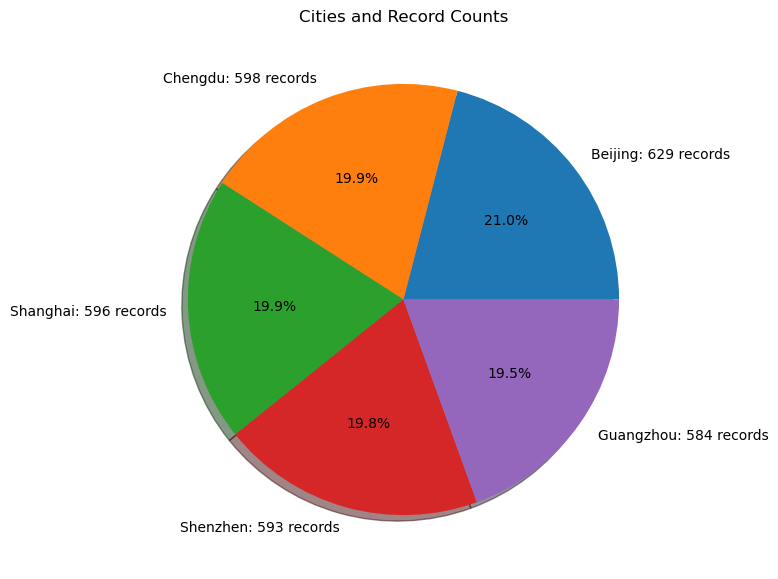

In [22]:
# Quick overview
print(f"[{china_emissions['City'].nunique()}] different cities and [{china_emissions['City'].count()}] total records available.")

# Get city counts
cities = china_emissions["City"].value_counts()

cities.plot.pie(
    labels=[f"{c}: {p} records" for c, p in zip(cities.index, cities.values)],
    autopct="%.1f%%",
    shadow=True,
    figsize=(7,7),
    title="Cities and Record Counts"
);
plt.ylabel('');
plt.show()

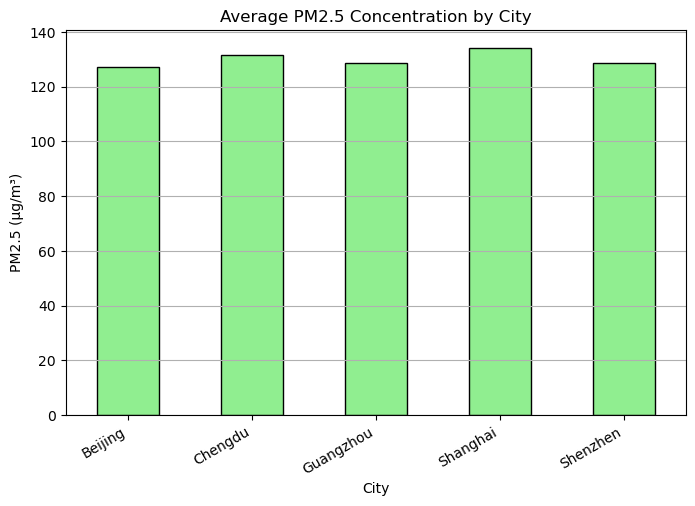

In [24]:
# Since we only have 5 cities, use all of them
# Average PM2.5 per city
city_pollution_avg = china_emissions.groupby("City")["PM2.5 (µg/m³)"].mean()

# Bar plot: average PM2.5
city_pollution_avg.plot.bar(
    title="Average PM2.5 Concentration by City",
    ylabel="PM2.5 (µg/m³)",
    xlabel="City",
    figsize=(8, 5),
    color="lightgreen",
    edgecolor="black"
);
plt.xticks(rotation=30, ha='right');
plt.grid(axis='y')
plt.show()

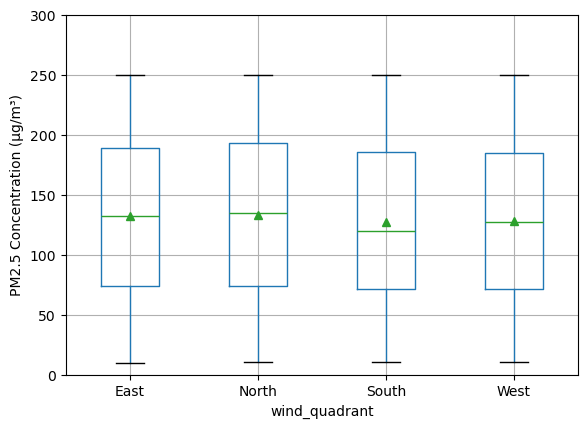

In [26]:
# Extra: Pollution Distribution based on Wind Quadrants
def wind_quadrant(deg):
    if deg >= 315 or deg < 45:
        return "North"
    elif deg >= 45 and deg < 135:
        return "East"
    elif deg >= 135 and deg < 225:
        return "South"
    else:
        return "West"

china_emissions["wind_quadrant"] = china_emissions["Wind Direction (°)"].apply(wind_quadrant)

# Boxplot
quartiles_pollution = china_emissions.boxplot(column="PM2.5 (µg/m³)", by="wind_quadrant", showmeans=True)
quartiles_pollution.set_ylabel("PM2.5 Concentration (µg/m³)")
quartiles_pollution.set_title("")
plt.suptitle("")
plt.ylim(0, 300)  # adjust depending on your dataset range
plt.show()

City left after screening: [5]


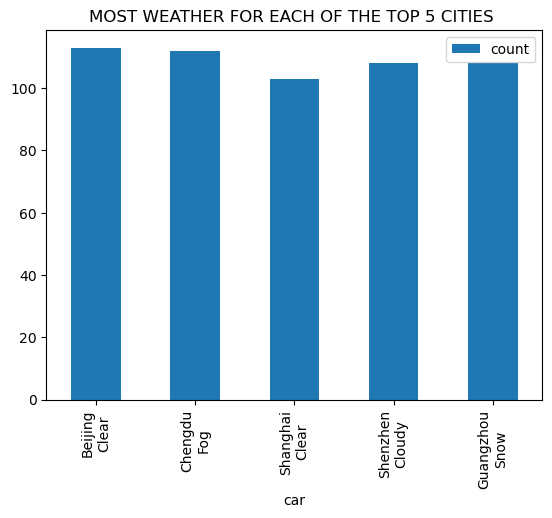

In [42]:
city = china_emissions["City"].value_counts()
weather_and_cities = china_emissions[["City", "Weather Condition"]].copy()
weather_and_cities = weather_and_cities[weather_and_cities.City.isin(majority_cities.index)]
print("City left after screening: [" + str(weather_and_cities.City.nunique()) + "]")

weather_and_cities = weather_and_cities.value_counts(["City", "Weather Condition"]) \
        .reset_index(name = "count")                                          \
        .sort_values(["count"], ascending = False)                            \
        .drop_duplicates(["City"])                                    \
        .set_index(["City"])                                          \
        .reindex(majority_cities.index) # ri-ordiniamo secondo la classifica dei brand stilata in precedenza
weather_and_cities["car"] = weather_and_cities.index + "\n" + weather_and_cities["Weather Condition"] # concateniamo le stringhe
weather_and_cities.plot.bar(title = "MOST WEATHER FOR EACH OF THE TOP 5 CITIES ", x = "weather", y = "count");

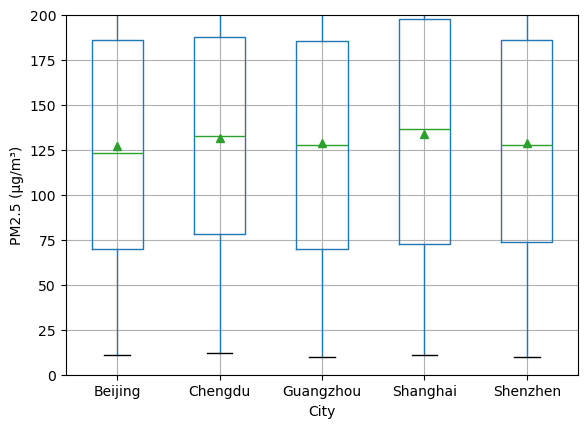

In [52]:
quartiles_first = china_emissions.boxplot(column = "PM2.5 (µg/m³)", by = "City", showmeans = True);
quartiles_first.set_ylabel("PM2.5 (µg/m³)");
quartiles_first.set_title("");
plt.ylim(0, 200);
plt.suptitle("");

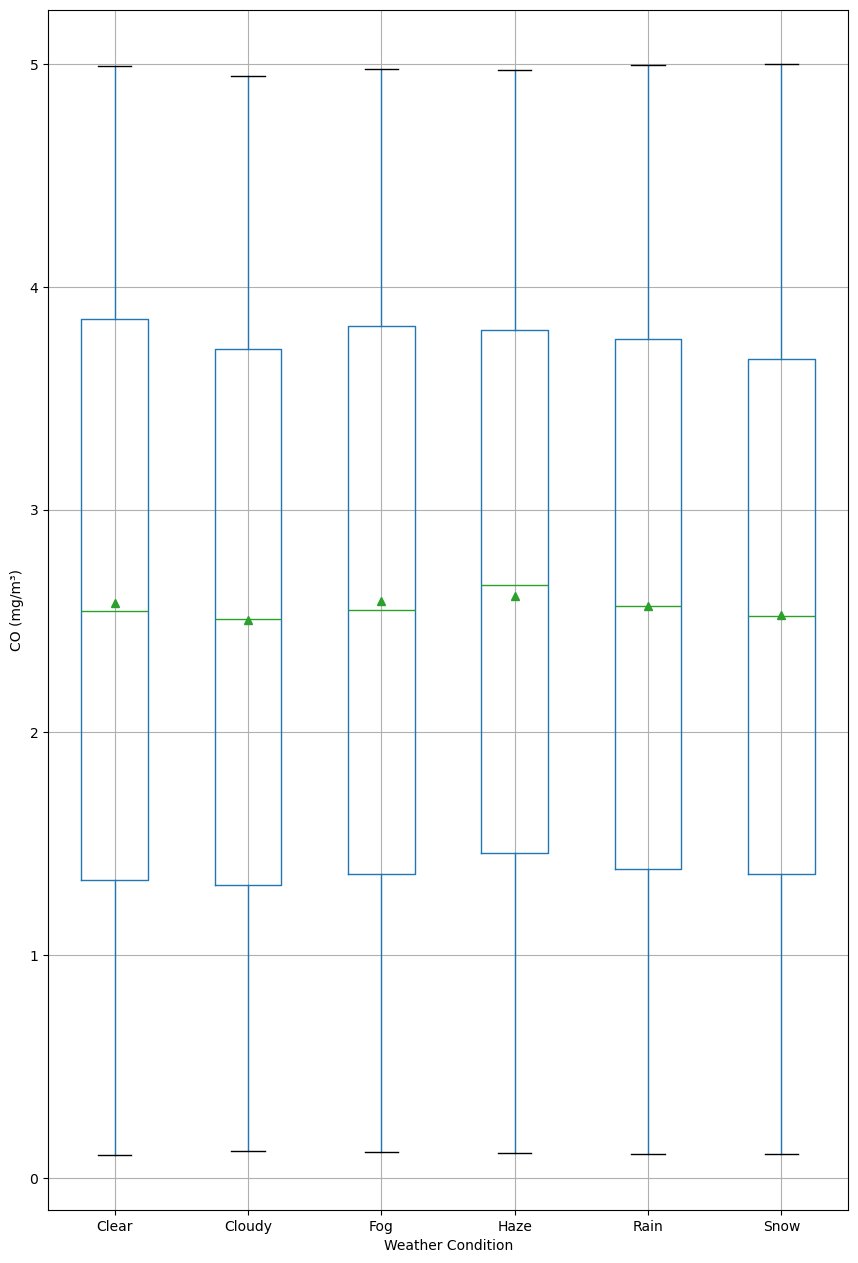

In [54]:
quartiles_second = china_emissions.boxplot(column = "CO (mg/m³)", by = "Weather Condition", showmeans=True, figsize = (10, 16));
quartiles_second.set_ylabel("CO (mg/m³)");
quartiles_second.set_title("");
plt.suptitle("");


City by population

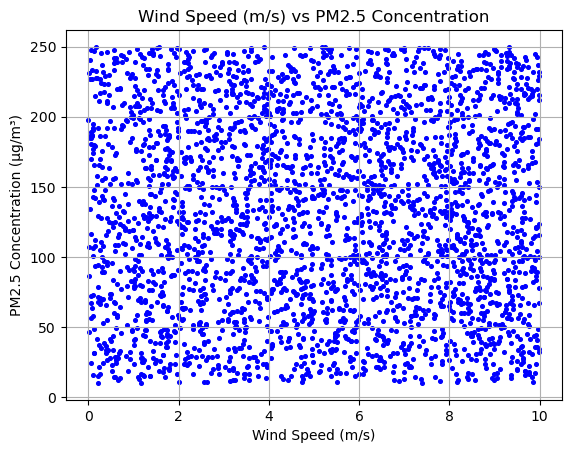

Pearson correlation coefficient between Wind Speed (m/s) and PM2.5: [-0.01]


In [38]:
# Scatter plot: Temperature vs PM2.5
china_emissions.plot.scatter(
    x="Wind Speed (m/s)",
    y="PM2.5 (µg/m³)",
    s=7,
    c="blue",
    title="Wind Speed (m/s) vs PM2.5 Concentration"
);
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.grid(True)
plt.show()

# Pearson correlation
corr_value = china_emissions["Wind Speed (m/s)"].corr(china_emissions["PM2.5 (µg/m³)"])
print("Pearson correlation coefficient between Wind Speed (m/s) and PM2.5: [{:.2f}]".format(corr_value))

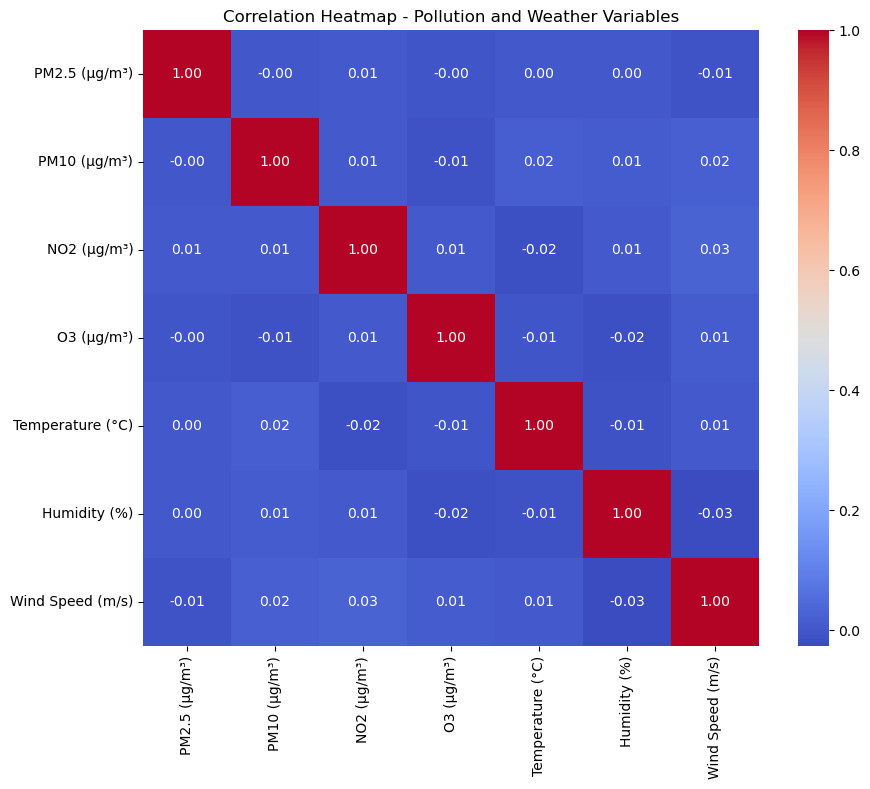

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations
corr_matrix = china_emissions[["PM2.5 (µg/m³)", "PM10 (µg/m³)", "NO2 (µg/m³)", "O3 (µg/m³)", "Temperature (°C)", "Humidity (%)", "Wind Speed (m/s)"]].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap - Pollution and Weather Variables")
plt.show()

C:\Users\jacop\AppData\Local\Temp\ipykernel_272\685722305.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pm25_by_temp = china_emissions.groupby("temp_bin")["PM2.5 (µg/m³)"].mean()


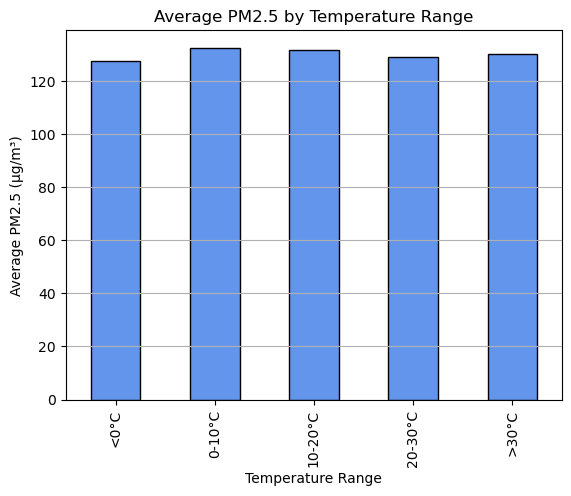

In [42]:
# Create temperature bins
bins = [-10, 0, 10, 20, 30, 40]
labels = ["<0°C", "0-10°C", "10-20°C", "20-30°C", ">30°C"]
china_emissions["temp_bin"] = pd.cut(china_emissions["Temperature (°C)"], bins=bins, labels=labels)

# Average PM2.5 per temperature bin
pm25_by_temp = china_emissions.groupby("temp_bin")["PM2.5 (µg/m³)"].mean()

# Plot
pm25_by_temp.plot.bar(
    title="Average PM2.5 by Temperature Range",
    xlabel="Temperature Range",
    ylabel="Average PM2.5 (µg/m³)",
    color="cornflowerblue",
    edgecolor="black"
)
plt.grid(axis='y')
plt.show()

In [6]:
# Basic info
china_emissions.info()

# Check for missing values
missing_vals = china_emissions.isna().sum()
print("Missing values per column:\n", missing_vals)

# Describe numerical features
china_emissions.describe()

# Count unique cities or pollutants
print(f"Unique cities: {china_emissions['City'].nunique()}")
print(f"Unique pollutants: {china_emissions['PM2.5 (µg/m³)'].unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PM2.5 (µg/m³)       3000 non-null   float64
 1   PM10 (µg/m³)        3000 non-null   float64
 2   NO2 (µg/m³)         3000 non-null   float64
 3   SO2 (µg/m³)         3000 non-null   float64
 4   CO (mg/m³)          3000 non-null   float64
 5   O3 (µg/m³)          3000 non-null   float64
 6   Temperature (°C)    3000 non-null   float64
 7   Humidity (%)        3000 non-null   float64
 8   Wind Speed (m/s)    3000 non-null   float64
 9   Wind Direction (°)  3000 non-null   float64
 10  Pressure (hPa)      3000 non-null   float64
 11  Precipitation (mm)  3000 non-null   float64
 12  Visibility (km)     3000 non-null   float64
 13  AQI                 3000 non-null   int64  
 14  Season              3000 non-null   object 
 15  City                3000 non-null   object 
 16  Latitu